/Users/ashwinsridhar/Documents/Projects/BitcoinPriceAnalyzer/Option Simulator v2/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Current price: $304.00
Expected price after 60 days: $442.23
Expected return: 45.47%
Probability of price increase: 70.80%
{'growth_rate': 4.29, 'metadata': {'model_type': 'fixed', 'description': 'Fixed annual growth rate model'}}


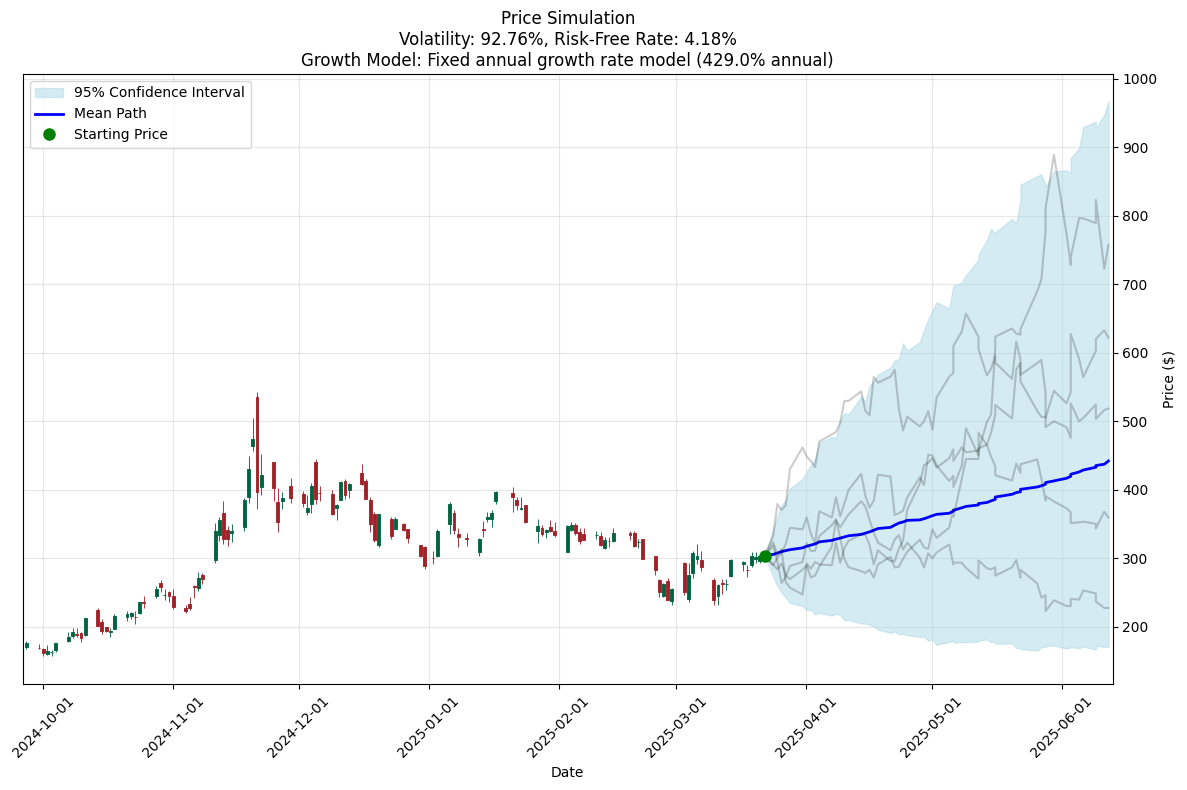

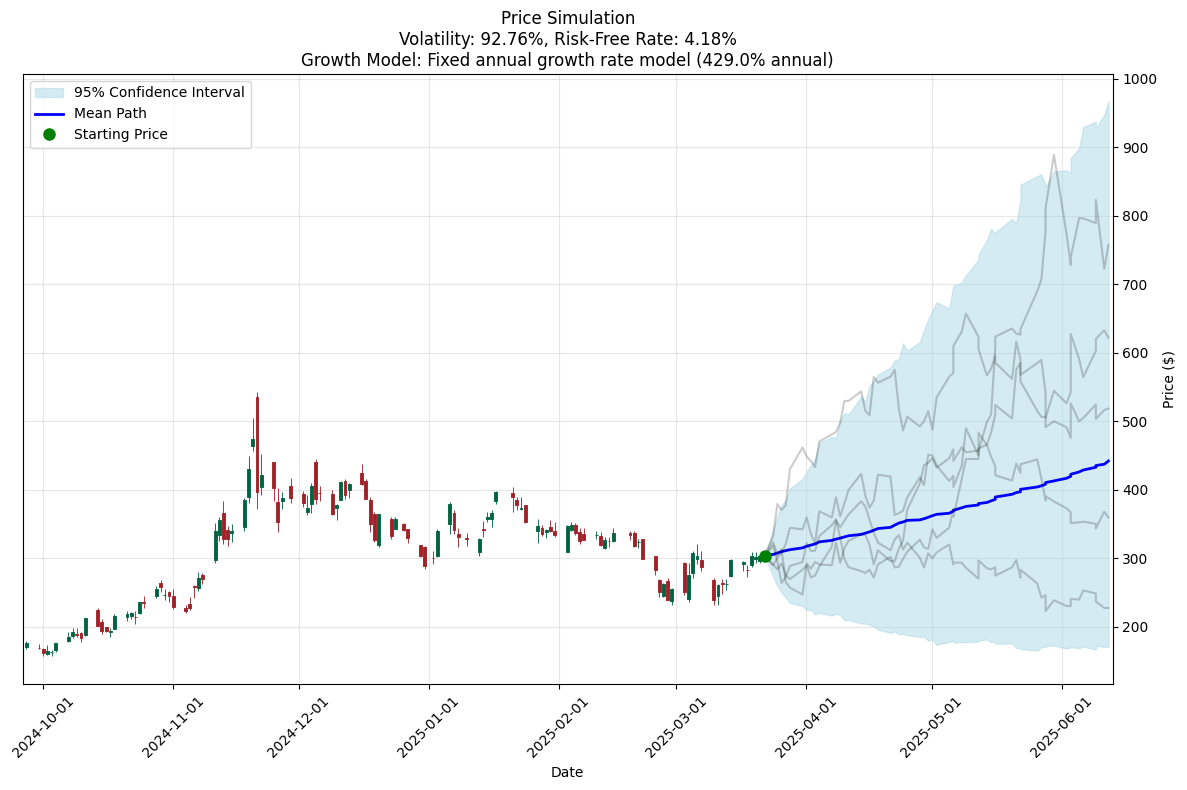

In [1]:
from financial_sim_library.stock_simulator.models.gbm import GBMModel
from financial_sim_library.visualization.price_plots import plot_price_simulations
from financial_sim_library.stock_simulator.models.growth_models import FixedGrowthModel
from financial_sim_library.utils.data_fetcher import fetch_historical_prices
import numpy as np

# Create a fixed growth model with 130% annual growth rate
fixed_growth = FixedGrowthModel(growth_rate=4.29)

ticker = "MSTR"

# Create a GBM model for Apple stock with the fixed growth model
model = GBMModel(ticker=ticker, growth_model=fixed_growth)

# Fetch historical data for the last 120 days
historical_data = fetch_historical_prices(ticker, period="6mo", interval="1d")  # Fetch 6 months to ensure we get 120 trading days
if historical_data.empty:
    print("Warning: Could not fetch historical data. Plotting simulation only.")

days_to_simulate = 60

# Run a simulation
results = model.simulate(
    days_to_simulate=days_to_simulate,
    num_simulations=1000
)
# Print key statistics
stats = results['statistics']
print(f"Current price: ${results['current_price']:.2f}")
print(f"Expected price after {days_to_simulate} days: ${stats['mean']:.2f}")
print(f"Expected return: {stats['expected_return']:.2f}%")
print(f"Probability of price increase: {stats['prob_above_current']:.2f}%")

print(results['parameters']['growth_model'])

# Visualize the results with historical data
plot_price_simulations(
    results,
    historical_data=historical_data,
    days_to_show=120  # Show last 120 days of historical data
)

In [1]:
from financial_sim_library.option_simulator.data_fetcher import MarketDataFetcher
from financial_sim_library.option_simulator.strategies import SimpleStrategy
from financial_sim_library.option_simulator.simulator import MonteCarloOptionSimulator
from datetime import datetime, timedelta

# Fetch market data and option contracts
fetcher = MarketDataFetcher()
current_price = fetcher.get_stock_price("AAPL")
# Set expiry date to 30 days from now
expiry_date = datetime.now() + timedelta(days=30)

# Get option contracts for a strategy
strategy_contracts = fetcher.get_option_strategy_contracts(
    "AAPL", 'covered_call', expiry_date
)

# Define strategy positions
positions = [
    # Long 100 shares of stock
    {'type': 'stock', 'symbol': "AAPL", 'quantity': 100, 'entry_price': current_price},
    # Short 1 call option
    {'contract': strategy_contracts['call'], 'quantity': -1}
]

# Create and run the simulation
strategy = SimpleStrategy("Covered Call", positions)
simulator = MonteCarloOptionSimulator(
    strategy=strategy,
    price_model='gbm',
    volatility=fetcher.get_historical_volatility("AAPL"),
    risk_free_rate=fetcher.get_risk_free_rate()
)

# Run 1000 price path simulations
results = simulator.run_simulation(num_paths=1000, num_steps=100)

/Users/ashwinsridhar/Documents/Projects/BitcoinPriceAnalyzer/Option Simulator v2/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Delta not found in option chain, using approximate method
